In [2]:
'''
문제2) 21세 이상의 피마 인디언 여성의 당뇨병 발병 여부에 대한 dataset을 이용하여 당뇨 판정을 위한 분류 모델을 작성한다.
피마 인디언 당뇨병 데이터는 아래와 같이 구성되어있다.
  Pregnancies: 임신 횟수
  Glucose: 포도당 부하 검사 수치
  BloodPressure: 혈압(mm Hg)
  SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
  Insulin: 혈청 인슐린(mu U/ml)
  BMI: 체질량지수(체중(kg)/키(m))^2
  DiabetesPedigreeFunction: 당뇨 내력 가중치 값
  Age: 나이
  Outcome: 5년 이내 당뇨병 발생여부 - 클래스 결정 값(0 또는 1)
당뇨 판정 칼럼은 outcome 이다.   1 이면 당뇨 환자로 판정
train / test 분류 실시
모델 작성은 Sequential API, Function API 두 가지를 사용한다.
loss, accuracy에 대한 시각화도 실시한다.
출력결과는 Django framework를 사용하시오.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/pykwon/python/refs/heads/master/testdata_utf8/prima-indians-diabetes.csv', header=None)
# print(data.head(3))

data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
# print(data.head(3))

x = data.drop(['Outcome'], axis=1)
y = data['Outcome']

# sns.countplot(x='Outcome', data=data)
# plt.show()

# train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)
# print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
# (537, 8) (231, 8) (537,) (231,)


In [11]:
# Sequential API
# model = Sequential([
#     Input(shape=(8,)),
#     Dense(32, activation='relu'),
#     Dense(16, activation='relu'),
#     Dense(1, activation='sigmoid'),
# ])

# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

# Function API
inputs = Input(shape=(8,))
net1 = Dense(32, activation='relu')(inputs)
batch1 = BatchNormalization()(net1)
drop1 = Dropout(0.5)(batch1)
net2 = Dense(16, activation='relu')(drop1)
batch2 = BatchNormalization()(net2)
drop2 = Dropout(0.5)(batch2)
net3 = Dense(1, activation='sigmoid')(drop2)
model = Model(inputs, net3)

model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['acc'])

# 조기 종료
early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(x_train, y_train, epochs=500, batch_size=8,
          validation_split=0.3, callbacks=[early_stop], verbose=0)

m_eval = model.evaluate(x_test, y_test, verbose=0)

print(f'평가 결과 : 손실 = {m_eval[0]:.4f}, 정확도 = {m_eval[1]*100:.4f}%')


평가 결과 : 손실 = 0.5296, 정확도 = 72.0779%


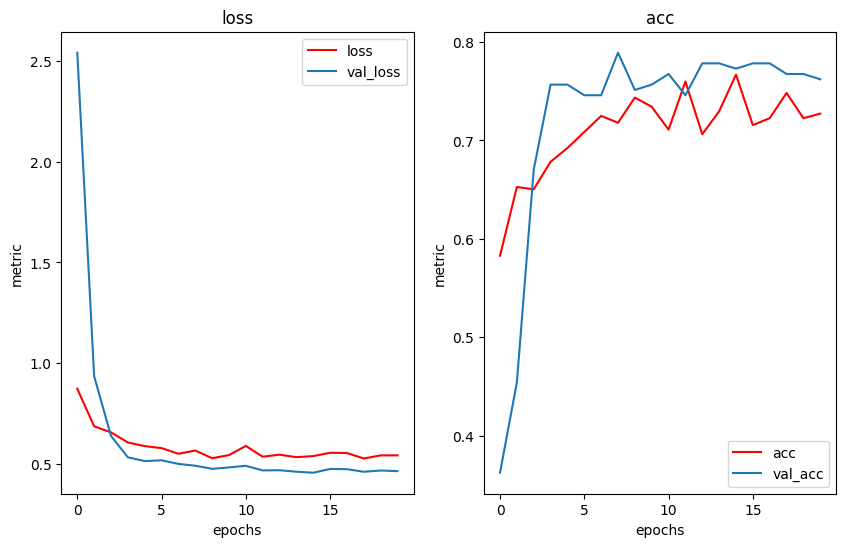

In [7]:
# 시각화
epochs = np.arange(len(history.epoch))

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(epochs, history.history['loss'], label='loss', color='r')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('metric')
plt.title('loss')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(epochs, history.history['acc'], label='acc', color='r')
plt.plot(epochs, history.history['val_acc'], label='val_acc')
plt.xlabel('epochs')
plt.ylabel('metric')
plt.title('acc')
plt.legend(loc='best')
plt.show()